## US ADULT DATA

## Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

%matplotlib inline

In [2]:
train = pd.read_csv('adult-training.csv', names=columns)
test = pd.read_csv('adult-test.csv', names=columns, skiprows=1)

In [3]:
train.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
Age               16281 non-null int64
Workclass         16281 non-null object
fnlgwt            16281 non-null int64
Education         16281 non-null object
Education num     16281 non-null int64
Marital Status    16281 non-null object
Occupation        16281 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Capital Gain      16281 non-null int64
Capital Loss      16281 non-null int64
Hours/Week        16281 non-null int64
Native country    16281 non-null object
Income            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


## Cleaning data
Some cells contain ' ?', we convert them to NaN

In [6]:
train.replace(' ?', np.nan, inplace=True)
test.replace(' ?', np.nan, inplace=True)

In [7]:
train.isnull().sum()

Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Native country     583
Income               0
dtype: int64

In [8]:
test.isnull().sum()

Age                 0
Workclass         963
fnlgwt              0
Education           0
Education num       0
Marital Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours/Week          0
Native country    274
Income              0
dtype: int64

As we see only Workclass, Occupation and Native country features have missing values.

# Features engineering

## Income

Simply change Income into 0's and 1's

In [9]:
train['Income'] = train['Income'].apply(lambda x: 1 if x==' >50K' else 0)
test['Income'] = test['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

## Age

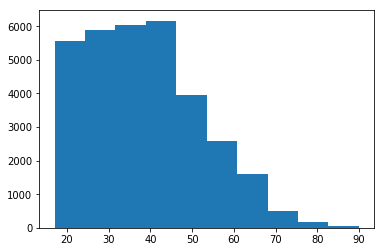

In [10]:
plt.hist(train['Age']);

Age looks skewed, it needs to be normalized. It'll be done later with sklearn.preprocessing.StandardScaller().

## Workclass

There are many empty rows, let's replace them with 0 and check how data plot looks like.

In [11]:
train['Workclass'].fillna(' 0', inplace=True)
test['Workclass'].fillna(' 0', inplace=True)

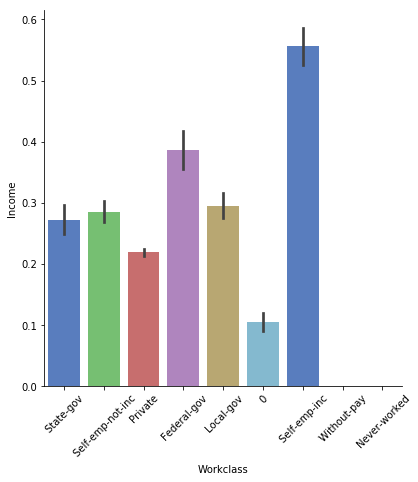

In [12]:
sns.factorplot(x="Workclass", y="Income", data=train, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);

In [13]:
train['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 0                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

As Never-worked and Without-pay look very similar, we merge them.

In [14]:
train['Workclass'].replace(' Without-pay', ' Never-worked', inplace=True)
test['Workclass'].replace(' Without-pay', ' Never-worked', inplace=True)

## fnlgwt

In [15]:
train['fnlgwt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64

Fnlgwt feature has high numers and big sandard deviation, let's take logarithm of that.

In [16]:
train['fnlgwt'] = train['fnlgwt'].apply(lambda x: np.log1p(x))
test['fnlgwt'] = test['fnlgwt'].apply(lambda x: np.log1p(x))

In [17]:
train['fnlgwt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlgwt, dtype: float64

## Education

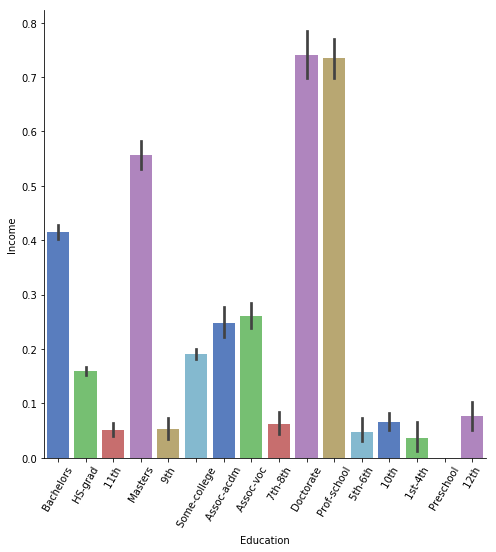

In [18]:
sns.factorplot(x="Education",y="Income",data=train,kind="bar", size = 7, 
palette = "muted")
plt.xticks(rotation=60);

Primary education is devided into grades, they all give almost the same result. We can merge them into one feature - Primary.

In [19]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return ' Primary'
    else:
        return x

In [20]:
train['Education'] = train['Education'].apply(primary)
test['Education'] = test['Education'].apply(primary)

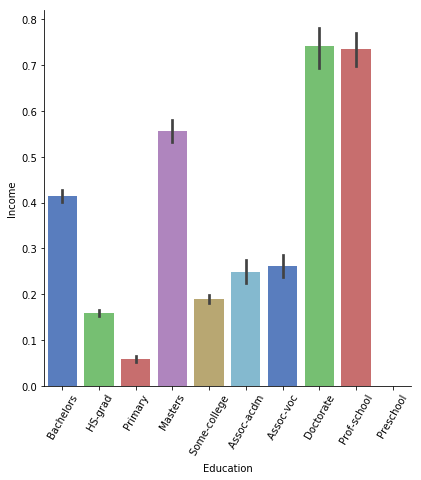

In [21]:
sns.factorplot(x="Education",y="Income",data=train,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

## Education num

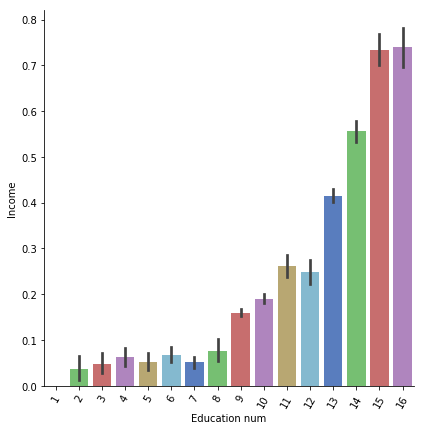

In [22]:
sns.factorplot(x="Education num",y="Income",data=train,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

## Marital Status

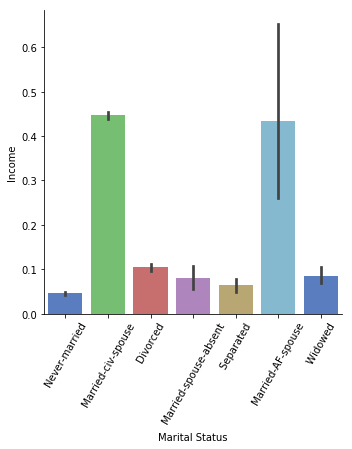

In [23]:
sns.factorplot(x="Marital Status",y="Income",data=train,kind="bar", size = 5, 
palette = "muted")
plt.xticks(rotation=60);

In [24]:
train['Marital Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64

There are very few Married-AF-spouse features. They are similar to Married-civ-spouse, so we can merge them.

In [25]:
train['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
test['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)

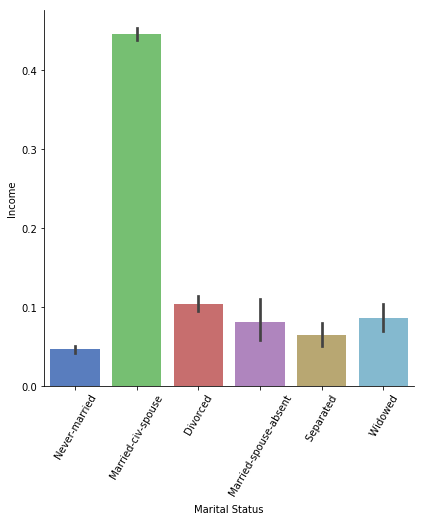

In [26]:
sns.factorplot(x="Marital Status",y="Income",data=train,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

## Occupation

In [27]:
train['Occupation'].fillna(' 0', inplace=True)
test['Occupation'].fillna(' 0', inplace=True)

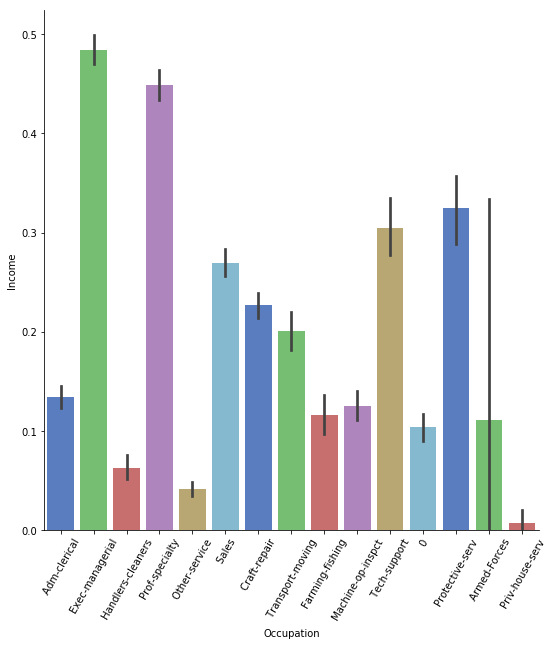

In [28]:
sns.factorplot(x="Occupation",y="Income",data=train,kind="bar", size = 8, 
palette = "muted")
plt.xticks(rotation=60);

In [29]:
train['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 0                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Everything looks good, except Armed-Forces. They are similar to 0 and that's what we replace them with.

In [30]:
train['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)
test['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)

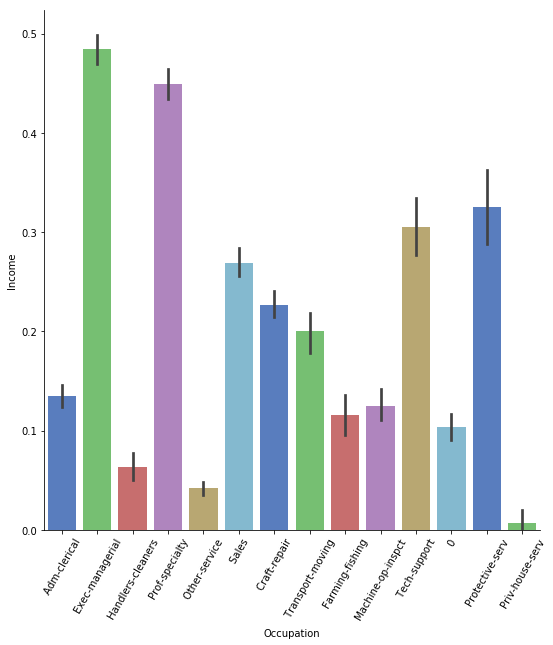

In [31]:
sns.factorplot(x="Occupation",y="Income",data=train,kind="bar", size = 8, 
palette = "muted")
plt.xticks(rotation=60);

## Relationship

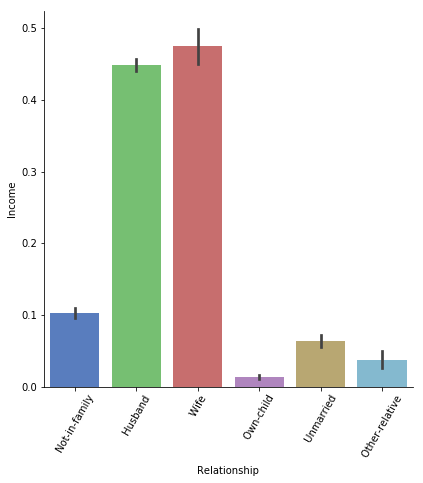

In [32]:
sns.factorplot(x="Relationship",y="Income",data=train,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

In [33]:
train['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

Looks good.

## Race

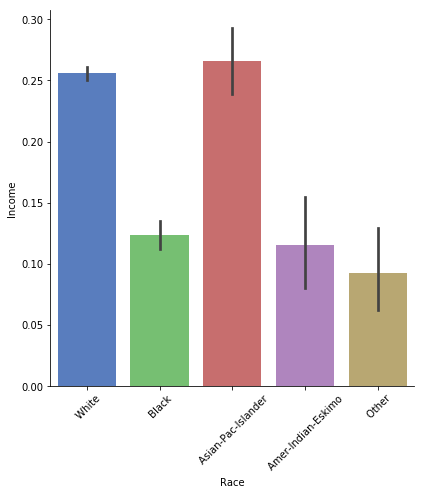

In [34]:
sns.factorplot(x="Race",y="Income",data=train,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);

In [35]:
train['Race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

Nothing to change.

## Sex

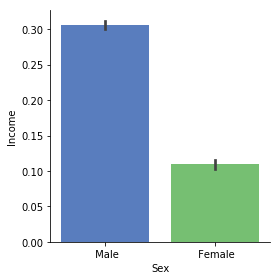

In [36]:
sns.factorplot(x="Sex",y="Income",data=train,kind="bar", size = 4, 
palette = "muted");

Here neither.

## Capital Gain , Capital Loss,  Hours/Week

These features just need to be standarized.

## Native country 

In [37]:
train['Native country'].fillna(' 0', inplace=True)
test['Native country'].fillna(' 0', inplace=True)

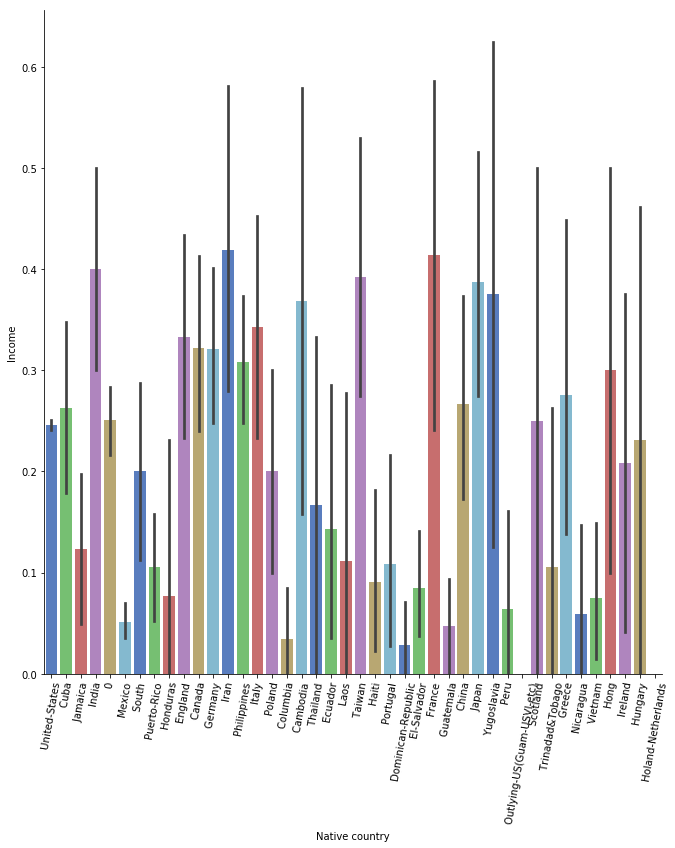

In [38]:
sns.factorplot(x="Native country",y="Income",data=train,kind="bar", size = 10, 
palette = "muted")
plt.xticks(rotation=80);

We need to segregate these countries into a few categories.

In [39]:
def native(country):
    if country in [' United-States', ' Cuba', ' 0']:
        return 'US'
    elif country in [' England', ' Germany', ' Canada', ' Italy', ' France', ' Greece', ' Philippines']:
        return 'Western'
    elif country in [' Mexico', ' Puerto-Rico', ' Honduras', ' Jamaica', ' Columbia', ' Laos', ' Portugal', ' Haiti',
                     ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', 
                     ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Vietnam', ' Holand-Netherlands' ]:
        return 'Poor' # no offence
    elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Yugoslavia', ' China', ' Hong']:
        return 'Eastern'
    elif country in [' South', ' Poland', ' Ireland', ' Hungary', ' Scotland', ' Thailand', ' Ecuador']:
        return 'Poland team'
    
    else: 
        return country    

In [40]:
train['Native country'] = train['Native country'].apply(native)
test['Native country'] = test['Native country'].apply(native)

In [41]:
train['Native country'].value_counts()

US             29848
Poor            1415
Western          677
Eastern          386
Poland team      235
Name: Native country, dtype: int64

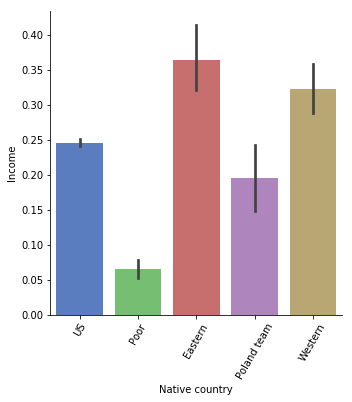

In [42]:
sns.factorplot(x="Native country",y="Income",data=train,kind="bar", size = 5, 
palette = "muted")
plt.xticks(rotation=60);

# One-hot encoding

Now we need to encode categorical features, we are going to do it with pd.get_dummies(). As this method may cause some problems, we merge datasets. It ensures that dimensions for both datasets are equal and also that given feature corresponds to the same dimension in both train and test datasets.

In [43]:
#merge datasets
joint = pd.concat([train, test], axis=0)

We need to analize features, find categorical ones and one-hot encode them.

In [44]:
joint.dtypes

Age                 int64
Workclass          object
fnlgwt            float64
Education          object
Education num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Native country     object
Income              int64
dtype: object

In [45]:
#list of columns with dtype: object
categorical_features = joint.select_dtypes(include=['object']).axes[1]

for col in categorical_features:
    print (col, joint[col].nunique())

Workclass 8
Education 10
Marital Status 6
Occupation 14
Relationship 6
Race 5
Sex 2
Native country 5


In [46]:
#one-hot encode
for col in categorical_features:
    joint = pd.concat([joint, pd.get_dummies(joint[col], prefix=col, prefix_sep=':')], axis=1)
    joint.drop(col, axis=1, inplace=True)

In [47]:
joint.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: 0,Workclass: Federal-gov,Workclass: Local-gov,...,Race: Black,Race: Other,Race: White,Sex: Female,Sex: Male,Native country:Eastern,Native country:Poland team,Native country:Poor,Native country:US,Native country:Western
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,12.281398,9,0,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,53,12.366157,7,0,0,40,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,28,12.732013,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


We separate train and test datasets.

In [48]:
train = joint.head(train.shape[0])
test = joint.tail(test.shape[0])

Xtrain = train.drop('Income', axis=1)
Ytrain = train['Income']

Xtest = test.drop('Income', axis=1)
Ytest = test['Income']

## Logistic regression data prediction

Creating Logistic Regression from scratch defining funtions: Hypothesis using Sigmoid function Calculating Loss function Fit Predict

In [49]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    #Hypothesis
    def __sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    #Loss Function
    def __loss(self, h, y):
        return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()

    #fitting values
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / y.size
            self.theta -= self.lr * gradient

    #Probability of prediction
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    #predicting the value
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

In [50]:
model = LogisticRegression()
model.fit(Xtrain, Ytrain)

Ztrain = model.predict(Xtrain)
Ztest = model.predict(Xtest)

D:\Ana\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


In [51]:
print('Accuracy of the Logistic Regression Model', (Ztrain == Ytrain).mean())

Accuracy of the Logistic Regression Model 0.779767206167
